## Five Link Solver

This notebok solves and graphs the kinematics of a five link suspension

In [2]:
from suspmatics.independent_suspension import Kinematic_Model
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import rc
from vpython import rate
import vpython

plt.rcParams['xtick.labelsize']=20      # change the tick label size for x axis
plt.rcParams['ytick.labelsize']=20      # change the tick label size for x axis
plt.rcParams['axes.linewidth']=3        # change the line width of the axis
plt.rcParams['xtick.major.width'] = 3   # change the tick line width of x axis
plt.rcParams['ytick.major.width'] = 3   # change the tick line width of y axis 
rc('text', usetex=False)                # disable LaTeX rendering in plots
rc('font',**{'family':'DejaVu Sans'})   # set the font of the plot to be DejaVu Sans

# Configure Geometry

In [4]:
link_lengths = np.array([296.3, 326.8, 377.4, 285.0, 526.2])
frame_pickups = np.array([[70.3, 422.1, -68.1],
                          [110.2, 352.8, 98.8],
                          [198.3, 406.9, 116.8],
                          [-196.6, 434.2, -48.8],
                          [-159.2, 194.9, 137]])
upright_pickups = np.array([[-61.9, -105.5, -82.1],
                          [123.5, -117, 90.3],
                          [-9.3, -98.5, 173.3],
                          [-124.4, -86.8, -68.9],
                          [-79.6, -85.7, 141.9]])


fl = Kinematic_Model.five_link(frame_pickups, link_lengths, upright_pickups)

Here are functions used to configure the driving variable and creat the table of solutions 

In [5]:
#solves suspension kinematics system of equations in terms of z
def solve_f_z(z, guess, kinematic_model):
    driving_var_index = 2
    
    def function(vars, arg):
        return kinematic_model.full_sys_of_eq(vars, (driving_var_index, arg))
    
    def jacobian(vars):
        return kinematic_model.jacobian(vars, driving_var_index)

    
    return sp.optimize.root(function, guess, args=z,fprime=jacobian) 

#solves for a list of inputs, using each output as a guess for the next solution
def create_table(inputs, solver, system, inital_guess):
    
    outputs = np.zeros([len(inputs),len(inital_guess)])
    
    guess = inital_guess
    for i, input in enumerate(inputs):
            outputs[i] = solver(input, guess, system)
            guess = outputs[i]


    return outputs

This creates the table of solutions using an initial guess

In [4]:
x_0 = np.array([0, 786, 100, 0, 0,  0, 
                2.02470359e+00,  2.92171653e-01,
                1.49465672e+00,  2.71959160e-01,  
                2.17539242e+00,  4.22984458e-01,
                1.27333142e+00,  2.85334899e-01,  
                1.39335333e+00,  1.99819738e-01,])
z_vals = np.linspace(100, -100, 500)
positions = create_table(z_vals, solve_f_z, fl, x_0)

print(positions[0])


[ 9.67027832e+00  7.81369382e+02  1.00000000e+02 -3.09872641e-02
  2.90958350e-02 -1.23955331e-02  2.03488692e+00  3.12721767e-01
  1.49394487e+00  2.83914819e-01  2.17443731e+00  4.36920667e-01
  1.27626776e+00  3.07459087e-01  1.39031730e+00  2.10097078e-01]


Here is th
e graphing of the wheel position and orientation for various z posisions

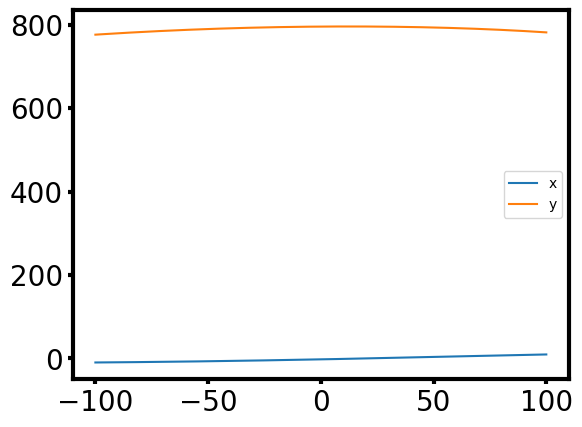

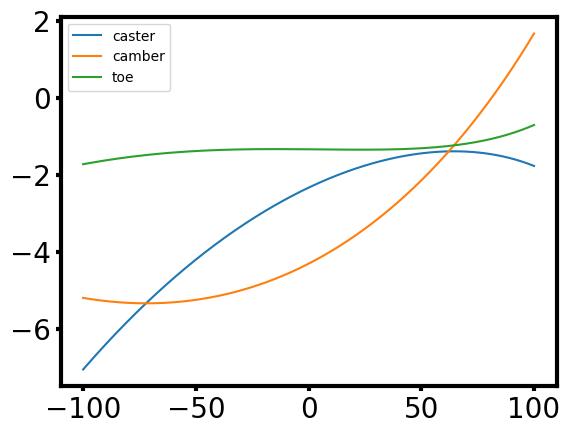

In [5]:
z = positions[:,2]

x = positions[:,0]
y = positions[:,1]
plt.plot(z, x)
plt.plot(z, y)
plt.legend(["x","y"])
plt.show()


caster = positions[:,3]
camber = positions[:,4]
toe = positions[:,5]
plt.plot(z, caster*180/np.pi)
plt.plot(z, camber*180/np.pi)
plt.plot(z, toe*180/np.pi)
plt.legend(["caster", "camber", "toe"])
plt.show()

Animation over the full range of outputs

In [ ]:
r = 70
loops = 20

vpython.arrow(axis=vpython.vector(0,0,50), color=vpython.color.blue)
vpython.arrow(axis=vpython.vector(-50,0,0), color=vpython.color.green)
vpython.arrow(axis=vpython.vector(0,-50,0), color=vpython.color.red)

for i in range(loops):
    for pos in positions:
        rate(r)
        fl.render(pos)
    for pos in reversed(positions):
        rate(r)
        fl.render(pos)